# Programming Assignment

## CNN classifier for the MNIST dataset

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
import visualkeras

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here



#### Load and preprocess the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 30

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
def scale_data(x_train, x_test):
    # Normalize the data. Before we need to connvert data type to float for computation.
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    return (x_train, x_test)

In [ ]:
# Run your function on the input data

x_train, x_test = scale_data(x_train, x_test)

In [ ]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Build the convolutional neural network model

In [ ]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    #define the convnet
    model = Sequential()
    model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))

    model.summary()
    return model

In [ ]:
# Run your function to get the model

model = get_model(x_train.shape[1:])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])


    

In [ ]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

Now you should train the model on the dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [ ]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, x_train, y_train):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
  
    

In [ ]:
# Run your function to train the model

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5326 - accuracy: 0.4466 - val_loss: 1.2926 - val_accuracy: 0.5356
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2083 - accuracy: 0.5708 - val_loss: 1.2163 - val_accuracy: 0.5764
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0764 - accuracy: 0.6221 - val_loss: 1.0838 - val_accuracy: 0.6158
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9803 - accuracy: 0.6573 - val_loss: 0.9961 - val_accuracy: 0.6575
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9048 - accuracy: 0.6823 - val_loss: 1.0444 - val_accuracy: 0.6391
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8450 - accuracy: 0.7034 - val_loss: 0.9830 - val_accuracy: 0.6653
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7869 - accuracy: 0.7241 - val_loss: 0.9871 - val_accurac

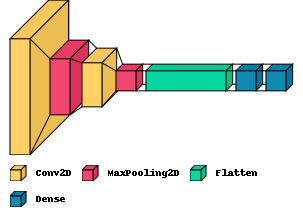

In [ ]:
visualkeras.layered_view(model, legend=True)

#### Plot the learning curves


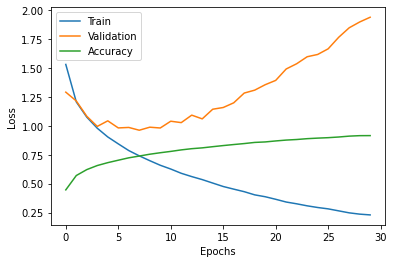

In [ ]:
def plotloss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['accuracy'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation', 'Accuracy'])
  plt.show() 
plotloss(history)  

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, x_test, y_test):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(x_test, y_test)
  

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.9412 - accuracy: 0.6530
Test loss: 1.9411896467208862
Test accuracy: 0.652999997138977


#### Second model with more layers

In [ ]:
def get_model2(input_shape):
    # Model_2 with more filters
    model_2 = Sequential()
    model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
    model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2,2)))
    model_2.add(Dropout(0.4)) 
    model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
    model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2,2)))
    model_2.add(Dropout(0.4))
    model_2.add(Flatten())
    model_2.add(Dense(1024,activation='relu'))
    model_2.add(Dense(1024,activation='relu'))
    model_2.add(Dense(units =10  , activation = 'softmax'))

    model_2.summary()
    return model_2

In [ ]:
model2 = get_model2(x_train.shape[1:])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 128)       131200    
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         262272    
                                                      

In [ ]:
compile_model(model2)

In [ ]:
history2 = train_model(model2, x_train, y_train)

Epoch 1/30
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6970 - accuracy: 0.3639 - val_loss: 1.4881 - val_accuracy: 0.4640
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4056 - accuracy: 0.4899 - val_loss: 1.2682 - val_accuracy: 0.5417
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2769 - accuracy: 0.5436 - val_loss: 1.1607 - val_accuracy: 0.5921
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1761 - accuracy: 0.5799 - val_loss: 1.0784 - val_accuracy: 0.6161
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1122 - accuracy: 0.6058 - val_loss: 1.0438 - val_accuracy: 0.6297
Epoch 6/30
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0528 - accuracy: 0.6273 - val_loss: 0.9900 - val_accuracy: 0.6558
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0041 - accuracy: 0.6471 - val_loss: 0.9640 - val_ac

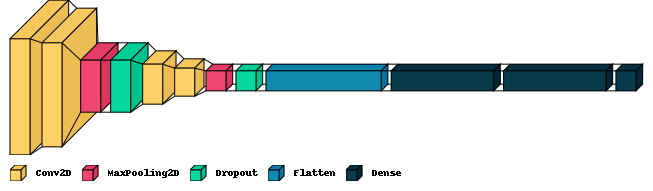

In [ ]:
visualkeras.layered_view(model2, legend=True)

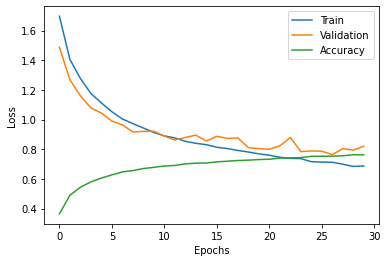

In [ ]:
plotloss(history2)  

In [ ]:
test_loss2, test_accuracy2 = evaluate_model(model2, x_test, y_test)
print(f"Test loss: {test_loss2}")
print(f"Test accuracy: {test_accuracy2}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8205 - accuracy: 0.7219
Test loss: 0.8205355405807495
Test accuracy: 0.7218999862670898
